In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
row_data_esp32 = pd.read_csv('/content/sample_data/ESP32_records.txt', delimiter=' ', header=None)

In [5]:
row_data_esp32 = row_data_esp32.drop(row_data_esp32.index[0])
row_data_esp32[0] -= 1

In [33]:
# Temporal, just for exploring
filtered_rows_0_1 = row_data_esp32[(row_data_esp32.iloc[:, 4] >= 0) & (row_data_esp32.iloc[:, 4] <=  1)]
filtered_rows_1_2 = row_data_esp32[(row_data_esp32.iloc[:, 4] >= 1.5) & (row_data_esp32.iloc[:, 4] <=  2.5)]
filtered_rows_2_3 = row_data_esp32[(row_data_esp32.iloc[:, 4] >= 2.5) & (row_data_esp32.iloc[:, 4] <=  3.5)]
filtered_rows_3_4 = row_data_esp32[(row_data_esp32.iloc[:, 4] >= 3.5) & (row_data_esp32.iloc[:, 4] <=  4.5)]
filtered_rows_4_5 = row_data_esp32[(row_data_esp32.iloc[:, 4] >= 4.5) & (row_data_esp32.iloc[:, 4] <=  5.5)]
filtered_rows_5_6 = row_data_esp32[(row_data_esp32.iloc[:, 4] >= 5.5) & (row_data_esp32.iloc[:, 4] <=  6.5)]
filtered_rows_6_7 = row_data_esp32[(row_data_esp32.iloc[:, 4] >= 6.5) & (row_data_esp32.iloc[:, 4] <=  7.5)]
filtered_rows_7_8 = row_data_esp32[(row_data_esp32.iloc[:, 4] >= 7.5) & (row_data_esp32.iloc[:, 4] <=  8.5)]
filtered_rows_8_9 = row_data_esp32[(row_data_esp32.iloc[:, 4] >= 8.5)]

In [38]:
row_number = 1
value = 0
data_esp32 = []
# print(row_data_esp32.shape[0])
while (row_number < row_data_esp32.shape[0]):
    filtered_rows = row_data_esp32[(row_data_esp32.iloc[:, 4] >= value + 0.5) & (row_data_esp32.iloc[:, 4] <= value + 1.5)]
    data_esp32.append(filtered_rows.iloc[:, 4].median())
    row_number += filtered_rows.shape[0]
    value += 1

data_esp32_series = pd.Series(data_esp32, name='ESP32')

In [39]:
ground_truth_distances_series = pd.Series([1,2,3,4,5,6,7,8,9], name='Ground Truth')
data_altogether = pd.DataFrame({'ESP32': data_esp32_series, 'Ground_Truth': ground_truth_distances_series})
data_altogether

,ESP32,Ground_Truth
0,0.802292,1
1,1.883743,2
2,2.946428,3
3,3.987999,4
4,5.020187,5
5,6.057067,6
6,7.093947,7
7,8.097984,8
8,9.139556,9


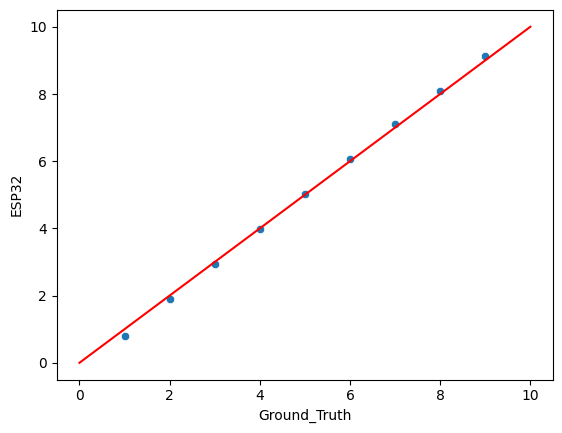

In [52]:
sns.scatterplot(data=data_altogether, x = 'Ground_Truth', y='ESP32')
plt.plot(np.linspace(0, 10), np.linspace(0, 10), color='red')